## Azure notebook Setup

In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'inpatient_admissions_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
inpatient_admissions_train_data= dataset.to_pandas_dataframe()

In [5]:
type(inpatient_admissions_train_data)

pandas.core.frame.DataFrame

In [6]:
inpatient_admissions_train_data.head()

,Column1,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State
0,0,10,65.649075,2015-11-28 17:41:09,2015-11-29 01:43:14,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,False,False,None,True,Utah
1,1,100001,83.767138,2009-10-01 21:19:50,2009-10-04 16:51:33,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,False,True,False,False,North Carolina
2,2,100001,84.873295,2010-11-10 04:32:39,2010-11-19 08:49:45,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,False,False,None,False,North Carolina
3,3,10001,70.900369,2020-03-20 02:02:26,2020-03-28 08:47:01,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,False,True,None,True,Florida
4,5,100016,83.054993,1999-11-20 14:23:45,1999-12-01 03:57:43,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,False,False,None,None,Idaho


----
# Inpatient Admissions
----

## **Dataset Description:**

- **Internalpatientid:** This is the unique identifier for each patient in the dataset.
- **Age at admission:** This feature indicates the age of the patient at the time of admission to the hospital.
---
- **Admission date:** This represents the date and time when the patient was admitted to the hospital.
- **Discharge date:** This represents the date and time when the patient was discharged from the hospital after receiving inpatient care.
---
- **Admitting unit service:** This feature indicates the unit or department of the hospital where the patient was admitted.
- **Discharging unit service:** This feature indicates the unit or department of the hospital where the patient was discharged from.
- **Admitting specialty:** This feature indicates the medical specialty of the physician who admitted the patient to the hospital.
- **Discharging specialty:** This feature indicates the medical specialty of the physician who discharged the patient from the hospital.
---
- **First listed discharge diagnosis icd10 subcategory:** This feature represents the primary diagnosis for which the patient received treatment during their hospital stay.
- **Second listed discharge diagnosis icd10 subcategory:** This feature represents any additional secondary diagnoses for which the patient received treatment during their hospital stay.
---
- **Discharge disposition:** This feature indicates the status of the patient at the time of discharge, such as whether they were discharged to home or to another healthcare facility.
- **Died during admission:** This feature indicates whether the patient passed away during their hospital stay.
---
 - **Yes/No**
- **Outpatient referral flag:** This feature indicates whether the patient was referred to outpatient care after their hospital stay.
- **Service-connected flag:** This feature indicates whether the patient's health condition is related to their military service.
- **Agent Orange flag:** This feature indicates whether the patient's health condition is related to exposure to Agent Orange, a herbicide used during the Vietnam War.
---
- **State:** This feature indicates the state where the hospital is located.

---

## **Content:**

- Reference: Explanation of Features

    - 1. Importing Libraries
    - 2. Data Exploration
    - 3. Checking for Missing Values
    - 4. Exploring Numerical Variables
    - 5. Exploring Object-Type Features
    - 6. Age-Based Bucketing for Listed Diagnosis ICD10 Subcategory Aggregation and Grouping
         - Checking Missing Values for Grouped columns
    - 7. Exploring the Death file
         - Merging Inpatient admissions Grouped Columns and death file with Left join on using Internalpatientid
         - Checking Missing Values for Death patients
    - 8. Bivariate Analysis for Each Column vs. Death
    - 9. Observations

---

### **Reference: Explanation of Features**

**Admitting unit service (11)**


- **Admitting unit service:** This feature indicates the unit or department of the hospital where the patient was admitted.
- **Discharging unit service:** This feature indicates the unit or department of the hospital where the patient was discharged from.





- **MEDICINE:** This refers to the branch of healthcare focused on the diagnosis, treatment, and prevention of diseases and illnesses using non-surgical methods. It involves prescribing medications, therapies, lifestyle modifications, and other non-invasive interventions.
​
- **SURGERY:** Surgery involves medical procedures performed by a surgeon to treat diseases, injuries, or conditions by manually altering or repairing body tissues or organs. It often involves making incisions and using surgical instruments to access and correct specific issues.
​
- **NHCU (Nursing Home Care Unit):** NHCU typically refers to a specialized unit within a healthcare facility, such as a hospital or nursing home, that provides care and support for individuals who require extended nursing care due to chronic illness, disability, or age-related conditions.
​
- **NON-COUNT:** In the given context, "NON-COUNT" is not a specific medical term. It could potentially refer to a category that does not involve a specific medical countable service or is not categorized under any specific medical department.
​
- **PSYCHIATRY:** Psychiatry is a branch of medicine that deals with the diagnosis, treatment, and management of mental health disorders. Psychiatrists assess mental health conditions, prescribe medications, and provide psychotherapy to help individuals with various mental health issues.
​
- **DOMICILIARY:** Domiciliary care refers to healthcare services provided in a patient's own home rather than in a healthcare facility. It involves medical professionals or caregivers delivering medical treatments, nursing care, or support services in a home setting.
​
- **BLIND REHAB:** Blind rehabilitation focuses on providing services and support to individuals who are blind or visually impaired. It may include orientation and mobility training, adaptive skills training, and assistive technology to help individuals live independently and navigate their environment.
​
- **INTERMEDIATE MED:** Intermediate medicine likely refers to a level of care that falls between acute (hospital-based) care and primary care. It may involve specialized medical services provided in outpatient clinics or community healthcare settings.
​
- **SPINAL CORD INJURY:** Spinal cord injury refers to damage to the spinal cord, often resulting in loss of sensation, movement, or other bodily functions. It can lead to various degrees of paralysis or impairment, depending on the location and severity of the injury.
​
- **REHAB MEDICINE:** Rehabilitation medicine, also known as physical medicine and rehabilitation (PM&R), focuses on restoring functional abilities and improving quality of life for individuals with disabilities caused by injury, illness, or chronic conditions. It involves a multidisciplinary approach that may include physical therapy, occupational therapy, and other rehabilitation techniques.
​
- **NEUROLOGY:** Neurology is a branch of medicine that deals with the diagnosis and treatment of disorders related to the nervous system, including the brain, spinal cord, and nerves. Neurologists diagnose and manage conditions such as epilepsy, stroke, multiple sclerosis, and neurodegenerative disorders.

#### Admitting specialty (116)

- **Intermediate Medicine:** This is not a commonly used medical term. It's possible that it refers to a level of care in between acute and long-term care.

- **Pulmonary Tuberculosis:** This is a bacterial infection that primarily affects the lungs and can spread to other parts of the body. It can be treated with antibiotics but may require long-term therapy.

- **NH Short-Stay Continuing Care:** This refers to care provided in a nursing home for patients who require short-term rehabilitation or medical treatment.

- **Psych Resid Rehab Trmt Prog:** This refers to a program that provides residential rehabilitation and treatment services for individuals with mental illness.

- **Medical Step Down:** This refers to a unit in a hospital where patients are transferred from the intensive care unit (ICU) to a less intensive level of care as they recover.

- **Dod Beds in VA Facility:** This refers to hospital beds in Veterans Affairs (VA) facilities that are managed by the Department of Defense (DoD).

- **Cardiac Intensive Care Unit:** This refers to a specialized unit in a hospital that provides intensive care for patients with severe cardiac conditions, such as heart attacks or heart failure.

- **Not Specified:** This indicates that the admitting or discharging specialty or diagnosis was not specified in the dataset.

- **Subst Abuse CWT/Trans Resid:** This refers to a program that provides residential treatment and vocational rehabilitation services for individuals with substance abuse disorders.

- **Neurosurgery:** This is a specialty that focuses on the surgical treatment of disorders of the nervous system, including the brain, spinal cord, and peripheral nerves.

- **General (Acute Medicine):** This refers to the general medical care of patients who require acute (short-term) treatment and monitoring in a hospital.

- **Surgical Stepdown:** This refers to a unit in a hospital where patients are transferred from the surgical intensive care unit (SICU) to a less intensive level of care as they recover from surgery.

- **Spinal Cord Injury:** This refers to damage to the spinal cord that can result in a range of symptoms, such as paralysis, loss of sensation, and difficulty breathing.

- **Gastroenterology:** This is a specialty that focuses on the diagnosis and treatment of disorders of the digestive system, including the stomach, intestines, liver, and pancreas.

- **Blind Rehab Observation:** This refers to a program that provides rehabilitation services for individuals who are blind or visually impaired.

- **Telemetry:** This refers to the monitoring of a patient's vital signs, such as heart rate and rhythm, using a remote device.

- **Surgical Observation:** This refers to a unit in a hospital where patients are monitored after surgery to ensure that they are stable enough to be discharged.

- **Long Stay Grecc-NHCU:** This refers to a nursing home care unit that provides long-term care for veterans with chronic medical conditions.

- **Blind Rehab:** This refers to a program that provides rehabilitation services for individuals who are blind or visually impaired.

- **Anesthesiology:** This is a specialty that focuses on the administration of anesthesia for surgical and medical procedures.

**First listed discharge diagnosis icd10 subcategory** (738)

- **Heart failure, unspecified:**
This refers to a condition where the heart is unable to pump enough blood to meet the body's needs, but the specific cause is not specified. It is a broad term that encompasses various underlying conditions or factors that can contribute to heart failure.

- **Atherosclerotic heart disease of native coronary artery:**
Atherosclerotic heart disease is a condition where the coronary arteries that supply blood to the heart become narrowed due to the buildup of plaque. This specific feature refers to the presence of atherosclerosis in the native (original) coronary arteries, which can lead to decreased blood flow and potential heart-related symptoms.

- **Alcohol dependence:**
Alcohol dependence, also known as alcoholism, is a chronic condition characterized by a strong desire to drink alcohol, difficulty controlling consumption, and withdrawal symptoms when alcohol use is stopped or reduced. It is considered a substance use disorder and can have detrimental effects on physical and mental health.

- **Chronic obstructive pulmonary disease with (acute) exacerbation:**
Chronic obstructive pulmonary disease (COPD) is a progressive lung disease that obstructs airflow and makes breathing difficult. An exacerbation refers to a sudden worsening of symptoms, which may include increased coughing, shortness of breath, wheezing, and chest tightness. This feature indicates the presence of a COPD exacerbation.

- **Unspecified atrial fibrillation and atrial flutter:**
Atrial fibrillation and atrial flutter are abnormal heart rhythms that affect the upper chambers (atria) of the heart. Unspecified means that the specific type or cause of atrial fibrillation or atrial flutter is not specified in the medical record. These conditions can cause palpitations, shortness of breath, fatigue, and an increased risk of stroke.

- **Other chest pain:**
This feature indicates the presence of chest pain that is not further specified or categorized. Chest pain can have various causes, ranging from musculoskeletal issues to heart-related problems. Further evaluation is typically needed to determine the underlying cause and appropriate treatment.

- **Pneumonia, unspecified organism:**
Pneumonia is an infection that inflames the air sacs in one or both lungs, leading to symptoms such as cough, fever, chest pain, and difficulty breathing. Unspecified organism means that the specific bacteria, virus, or other microorganism causing the pneumonia is not identified or documented.

- **Encounter for other specified aftercare:**
This feature indicates an encounter with healthcare providers for the purpose of providing follow-up or continuing care related to a specific condition or treatment. The specific condition or treatment is not specified in this feature and would require further information from the medical record to determine the details.

- **Systolic (congestive) heart failure:**
Systolic heart failure is a type of heart failure where the heart's left ventricle does not contract effectively, leading to reduced blood flow and inadequate delivery of oxygen and nutrients to the body. This can result in symptoms such as fatigue, shortness of breath, fluid retention, and exercise intolerance.

- **Sepsis, unspecified organism:**
Sepsis is a potentially life-threatening condition that occurs when the body's response to an infection causes widespread inflammation. It can lead to organ dysfunction and failure. Unspecified organism means that the specific bacteria, virus, or other microorganism causing the infection is not identified or documented.

**Discharge disposition** (7)

- **Regular:**
This indicates that the patient was discharged from the healthcare facility after receiving appropriate treatment and meeting the necessary criteria for discharge. It suggests that the patient's condition stabilized, and they no longer required inpatient care.

- **Transfer:**
Transfer refers to the movement of a patient from one healthcare facility to another. This could be due to the need for specialized care or services that the initial facility cannot provide. It often involves transferring the patient to a higher level of care or a different healthcare setting.

- **Death without autopsy:**
This indicates that the patient passed away while in the healthcare facility, and no autopsy was performed. An autopsy is a medical examination of a deceased person's body to determine the cause of death. In this case, the cause of death may be determined through other means, such as clinical evaluation and medical history.

- **Irregular:**
Irregular suggests that the patient's discharge did not follow the standard or expected protocols. It could refer to a variety of situations, such as an unplanned discharge, premature discharge, or discharge against medical advice. Further information from the medical record would be needed to determine the specific circumstances.

- **NBC or while ASIH:**
NBC stands for "no bed change," indicating that the patient did not change beds during their stay in the healthcare facility. ASIH stands for "as seen in-house," suggesting that the patient passed away while still in the healthcare facility. This could include cases where resuscitation efforts were unsuccessful.

- **Death with autopsy:**
This indicates that the patient passed away while in the healthcare facility, and an autopsy was performed. An autopsy helps determine the cause and manner of death by conducting a detailed examination of the body, including organs and tissues. It provides valuable information for medical research and quality assurance purposes.

- **Not specified (no value):**
This means that the discharge disposition was not specified or documented. It could indicate missing or incomplete information in the medical record, where the specific disposition was not recorded.

## 1. Importing Libraries

In [7]:
# Importing essential libraries
import pandas as pd        # Library for data manipulation and analysis
import numpy as np         # Library for mathematical operations
import matplotlib.pyplot as plt     # Library for data visualization
import seaborn as sns       # Library for advanced data visualization

## 2. Data Exploration

In [8]:
# changing variable name for dataframe
df = inpatient_admissions_train_data

In [9]:
# Display the first few rows of a DataFrame
df.head()

,Column1,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State
0,0,10,65.649075,2015-11-28 17:41:09,2015-11-29 01:43:14,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,False,False,None,True,Utah
1,1,100001,83.767138,2009-10-01 21:19:50,2009-10-04 16:51:33,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,False,True,False,False,North Carolina
2,2,100001,84.873295,2010-11-10 04:32:39,2010-11-19 08:49:45,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,False,False,None,False,North Carolina
3,3,10001,70.900369,2020-03-20 02:02:26,2020-03-28 08:47:01,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,False,True,None,True,Florida
4,5,100016,83.054993,1999-11-20 14:23:45,1999-12-01 03:57:43,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,False,False,None,None,Idaho


In [10]:
# Shape of the dataset
df.shape

num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 522740
Number of columns: 17


In [11]:
# Get the number of unique values in the 'Internalpatientid' column
print("Number of Unique Internalpatientid")
df['Internalpatientid'].nunique()

Number of Unique Internalpatientid


84536

In [12]:
# Dropping unnammed column
df = df.drop(df.columns[0], axis=1)

In [13]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522740 entries, 0 to 522739
Data columns (total 16 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   Internalpatientid                                    522740 non-null  int64         
 1   Age at admission                                     522740 non-null  float64       
 2   Admission date                                       522740 non-null  datetime64[ns]
 3   Discharge date                                       522246 non-null  datetime64[ns]
 4   Admitting unit service                               522740 non-null  object        
 5   Discharging unit service                             522740 non-null  object        
 6   Admitting specialty                                  522740 non-null  object        
 7   Discharging specialty                                522740 non-null  obje

- The 'Internalpatientid' column contains integer values, while the 'Age at admission' column is in float format. The rest of the features are represented as objects.

## 3. Checking for Missing Values

In [14]:
# List comprehension to find columns with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['Discharge date',
 'Outpatientreferralflag',
 'Serviceconnectedflag',
 'Agentorangeflag']

In [15]:
# Count the number of missing values in each column
df.isnull().sum()

Internalpatientid                                           0
Age at admission                                            0
Admission date                                              0
Discharge date                                            494
Admitting unit service                                      0
Discharging unit service                                    0
Admitting specialty                                         0
Discharging specialty                                       0
First listed discharge diagnosis icd10 subcategory          0
Second listed discharge diagnosis icd10 subcategory         0
Discharge disposition                                       0
Died during admission                                       0
Outpatientreferralflag                                  26443
Serviceconnectedflag                                   487689
Agentorangeflag                                        104512
State                                                       0
dtype: i

- The dataset has missing values, particularly in the 'Outpatientreferralflag', 'Serviceconnectedflag', and 'Agentorangeflag' columns. Additionally, there are a few missing values in the 'Discharge date' column."

## 4. Exploring Numerical Variables

### Age at admission

In [16]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Internalpatientid,Age at admission
count,522740.000000,522740.000000
mean,84807.692788,69.176296
std,48932.437885,11.868582
min,1.000000,20.399133
25%,42251.500000,60.852513
50%,85375.500000,69.079457
75%,127134.000000,77.821331
max,169064.000000,109.224928


In [17]:
# Calculate descriptive statistics for the dataframe
description = df.describe()
min_age = description.loc['min', 'Age at admission']  # Extract the minimum age value
max_age = description.loc['max', 'Age at admission']  # Extract the maximum age value
mean = description.loc['mean', 'Age at admission']  # Extract the mean age value
count = description.loc['count', 'Age at admission']  # Extract the count of age values

print("Age at admission:") 
print("Mean age: {:.2f}".format(mean))  # Print the mean age formatted with two decimal places
print("Minimum Age: {:.2f}".format(min_age))  # Print the minimum age formatted with two decimal places
print("Maximum Age: {:.2f}".format(max_age))  # Print the maximum age formatted with two decimal places
print("Count:", count)  

Age at admission:
Mean age: 69.18
Minimum Age: 20.40
Maximum Age: 109.22
Count: 522740.0


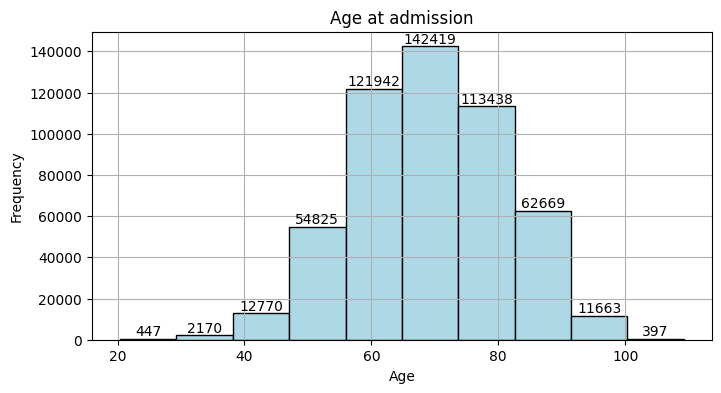

In [17]:
# Create a histogram for age column
age = df['Age at admission']

plt.figure(figsize=(8, 4))
hist = plt.hist(age, bins=10, edgecolor='black', color='lightblue')  # Adjust the number of bins as needed

# Add x-bar values to each bar
for i in range(len(hist[0])):
    plt.text(hist[1][i] + (hist[1][i+1] - hist[1][i])/2, hist[0][i] + 10, str(int(hist[0][i])), ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age at admission')
plt.grid(True)  # Add grid lines
plt.show()

- The **mean age at admission** is approximately **69 years old**, which suggests that the majority of patients are elderly. 
- The **minimum age at admission is 20 years old, while the maximum is 109 years old**, highlighting the wide range of ages represented in the dataset. 
- The quartile values also show that 50% of the patients admitted were between 60 and 77 years old.

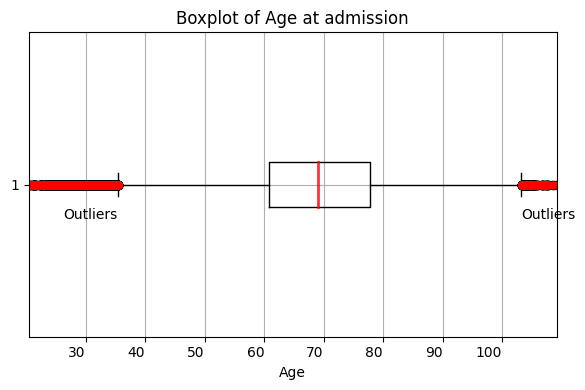

In [19]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at admission']

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Age')
plt.title('Boxplot of Age at admission')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

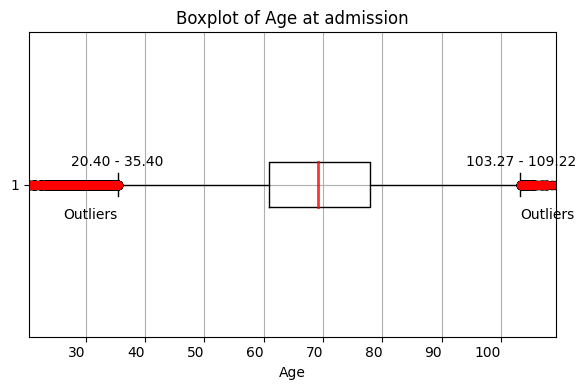

In [20]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at admission']

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Age')
plt.title('Boxplot of Age at admission')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(age):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(age):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

**Outlier Ages:** There are two ranges of outlier ages in the dataset. One range is between 20 and 36, and the other range is between 102 and 109.

---

## 5. Exploring Object type features

In [21]:
# descriptive statistics for the columns of object type 
df.describe(include=['object'])

,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State
count,522740,522740,522740,522740,522740,522740,522740,496297,35051,418228,522740
unique,14,14,124,101,3816,4057,7,2,2,2,50
top,MEDICINE,MEDICINE,BLIND REHAB OBSERVATION,GENERAL(ACUTE MEDICINE),"Heart failure, unspecified","Acute kidney failure, unspecified",Regular,True,False,False,Florida
freq,316423,310899,10851,213704,24524,17845,482223,392140,31643,374554,40922


### Admitting unit service (14)

In [22]:
df['Admitting unit service'].nunique()

14

In [23]:
# counts the frequency of each unique value 
df['Admitting unit service'].value_counts()

MEDICINE                    316423
SURGERY                      68391
NON-COUNT                    65725
NHCU                         28129
PSYCHIATRY                   24760
DOMICILIARY                   8289
SPINAL CORD INJURY            3258
INTERMEDIATE MED              2553
NEUROLOGY                     2498
REHAB MEDICINE                1245
BLIND REHAB                   1047
(Censored)                     357
Not specified (no value)        42
Not specified                   23
Name: Admitting unit service, dtype: int64

- Each variable represents a **particular treating specialty or ward** where patients with specific medical conditions are admitted and treated. 
- For example, Medicine refers to the ward where patients with internal medicine conditions are treated, Surgery refers to the ward where patients undergoing surgeries are admitted and treated, Spinal Cord Injury refers to the ward where patients with nontraumatic spinal cord injuries are admitted and treated, and so on. 
- The **non-count** variable probably refers to patients who are **not admitted to any of the specific wards** or specialties mentioned.

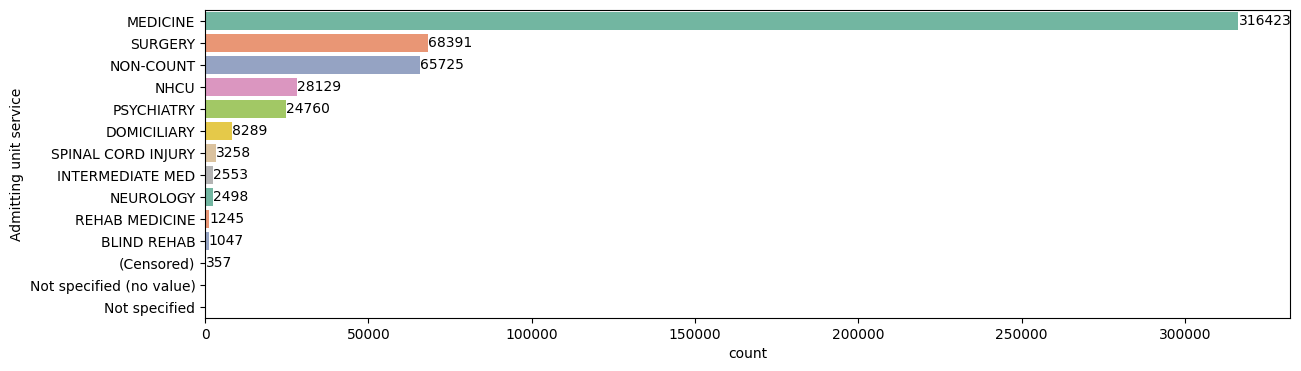

In [24]:
# Generate a frequency table of the categorical variable
freq_table = df['Admitting unit service'].value_counts()

# Set the figure size
plt.figure(figsize=(14, 4))  # Adjust the width and height as needed

# Define a custom color palette with different colors for each category
custom_palette = sns.color_palette("Set2", n_colors=len(freq_table))

# Plot the frequency table using Seaborn's countplot function with the custom color palette
ax = sns.countplot(y='Admitting unit service', data=df, order=freq_table.index[:14], palette=custom_palette)

# Add count labels to the bars
for i, count in enumerate(freq_table[:12]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

- There were 14 different admitting unit services and different discharging unit services. The most common admitting unit service was Medicine (316423 occurrences).

### Discharging unit service (14)

In [25]:
df['Discharging unit service'].nunique()

14

In [26]:
df['Discharging unit service'].value_counts()

MEDICINE                    310899
SURGERY                      68166
NON-COUNT                    65173
NHCU                         26141
PSYCHIATRY                   25916
DOMICILIARY                   8077
INTERMEDIATE MED              6880
SPINAL CORD INJURY            3674
REHAB MEDICINE                2882
NEUROLOGY                     2585
BLIND REHAB                   1025
Not specified (no value)       987
(Censored)                     311
Not specified                   24
Name: Discharging unit service, dtype: int64

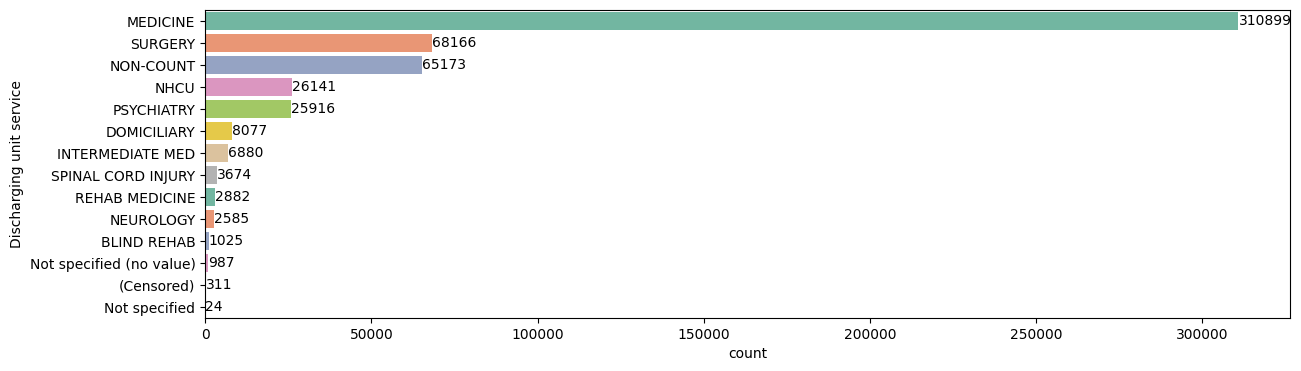

In [27]:
# Generate a frequency table of the categorical variable 
freq_table = df['Discharging unit service'].value_counts()

plt.figure(figsize=(14, 4))
custom_palette = sns.color_palette("Set2", n_colors=len(freq_table))
ax = sns.countplot(y='Discharging unit service', data=df, order=freq_table.index[:14], palette=custom_palette)
for i, count in enumerate(freq_table[:14]):
    ax.text(count, i, str(count), va='center')
plt.show()

- The most common discharging unit service was also Medicine (310899 occurrences).

#### Admitting_Discharging_unit_service

In [28]:
# To create a new column that combines the 'Admitting unit service' and 'Discharging unit service' columns into a single string representation
df['Admitting_Discharging_unit_service'] = df['Admitting unit service'] + '_' + df['Discharging unit service'].astype(str)

### Admitting specialty (124)

In [29]:
df['Admitting specialty'].nunique()

124

In [30]:
df['Admitting specialty'].value_counts()

BLIND REHAB OBSERVATION          10851
PULMONARY, TUBERCULOSIS          10669
INTERMEDIATE MEDICINE            10223
SPINAL CORD INJURY                9904
NH SHORT-STAY CONTINUING CARE     9764
                                 ...  
zSUBST ABUSE STAR I, II & III       45
Not specified (no value)            42
HIGH INTENSITY GEN INPT             18
PSYCHIATRY                           6
ZZSUBST ABUSE STAR I,II,II           4
Name: Admitting specialty, Length: 124, dtype: int64

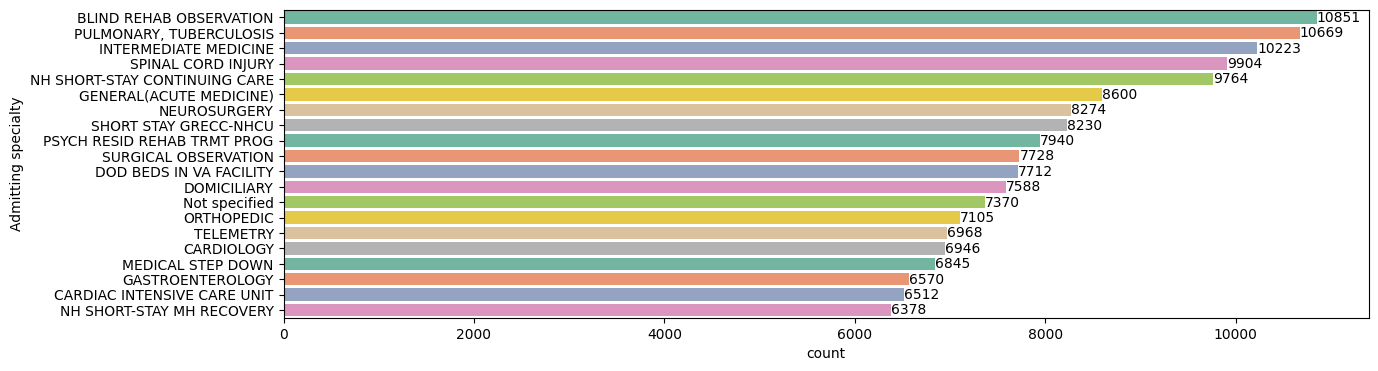

In [31]:
# Generate a frequency table of the categorical variable only top 20 categories
freq_table = df['Admitting specialty'].value_counts()
plt.figure(figsize=(14, 4))  
custom_palette = sns.color_palette("Set2", n_colors=len(freq_table))
ax = sns.countplot(y='Admitting specialty', data=df, order=freq_table.index[:20], palette=custom_palette)
for i, count in enumerate(freq_table[:20]):
    ax.text(count, i, str(count), va='center')
plt.show()

- There are 124 unique admitting specialties in the dataset, indicating that the hospital admits patients with a wide range of medical conditions and needs.
- The most common Admitting specialty was BLIND REHAB OBSERVATION (10851 occurrences).

### Discharging specialty (101)

In [32]:
df['Discharging specialty'].nunique()

101

In [33]:
df['Discharging specialty'].value_counts()

GENERAL(ACUTE MEDICINE)           213704
MEDICAL OBSERVATION                54210
Not specified (no value)           50412
TELEMETRY                          19079
HIGH INTENSITY GEN PSYCH INPAT     18738
                                   ...  
DOMICILIARY SUBSTANCE USE DO           4
DOMICILIARY GENERAL                    4
REHAB MEDICINE OBSERVATION             2
DERMATOLOGY                            2
ALLERGY                                1
Name: Discharging specialty, Length: 101, dtype: int64

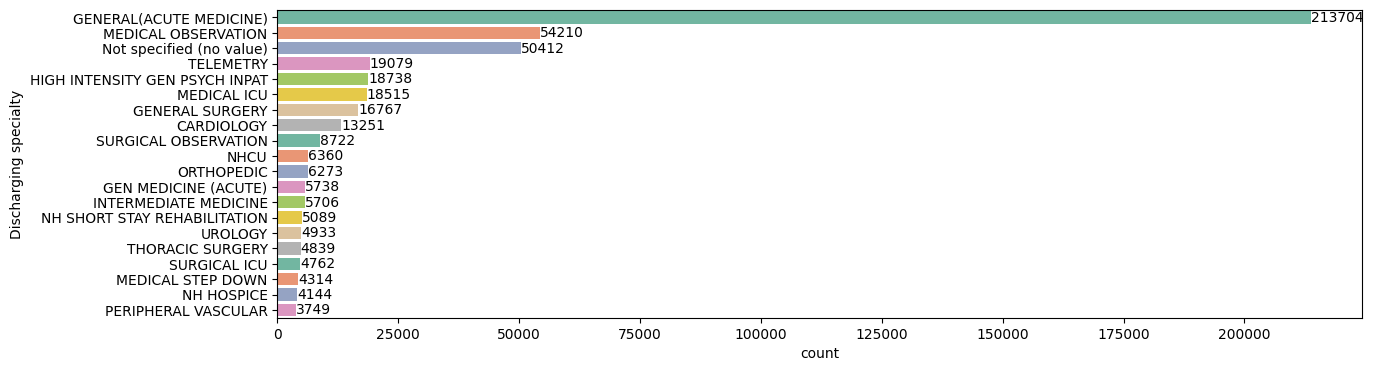

In [34]:
# Generate a frequency table of the categorical variable only top 20 categories
freq_table = df['Discharging specialty'].value_counts()
plt.figure(figsize=(14, 4))  # Adjust the width and height as needed
custom_palette = sns.color_palette("Set2", n_colors=len(freq_table))
ax = sns.countplot(y='Discharging specialty', data=df, order=freq_table.index[:20], palette=custom_palette)
for i, count in enumerate(freq_table[:20]):
    ax.text(count, i, str(count), va='center')
plt.show()

- There are 101 unique discharging specialties in the dataset, which may indicate that the hospital has a variety of departments or wards that cater to different medical conditions.
- The most common Discharging specialty was GENERAL(ACUTE MEDICINE) (213704 occurrences).

### First listed discharge diagnosis icd10 subcategory (3816)
#### (ICD-10-CM stands for International Classification of Diseases, 10th Revision)

In [35]:
df['First listed discharge diagnosis icd10 subcategory'].nunique()

3816

In [36]:
df['First listed discharge diagnosis icd10 subcategory'].value_counts()

Heart failure, unspecified                                         24524
Atherosclerotic heart disease of native coronary artery            24007
Chronic obstructive pulmonary disease with (acute) exacerbation    16609
Unspecified atrial fibrillation and atrial flutter                 12819
Pneumonia, unspecified organism                                    12068
                                                                   ...  
Endometriosis of ovary                                                 1
Disorders of copper metabolism                                         1
Other specified acquired deformities of musculoskeletal system         1
Benign neoplasm of mesothelial tissue of pleura                        1
Other follicular cysts of the skin and subcutaneous tissue             1
Name: First listed discharge diagnosis icd10 subcategory, Length: 3816, dtype: int64

In [37]:
df_first_icd10 = df['First listed discharge diagnosis icd10 subcategory'].value_counts().to_frame()

In [38]:
df_first_icd10 = df_first_icd10.reset_index()

In [39]:
df_first_icd10.columns=['First listed discharge diagnosis icd10 subcategory','counts for first_icd10']
df_first_icd10.head(20)

,First listed discharge diagnosis icd10 subcategory,counts for first_icd10
0,"Heart failure, unspecified",24524
1,Atherosclerotic heart disease of native corona...,24007
2,Chronic obstructive pulmonary disease with (ac...,16609
3,Unspecified atrial fibrillation and atrial flu...,12819
4,"Pneumonia, unspecified organism",12068
5,Encounter for other specified aftercare,11403
6,Other chest pain,11358
7,Alcohol dependence,11156
8,Non-ST elevation (NSTEMI) myocardial infarction,8073
9,Systolic (congestive) heart failure,7697


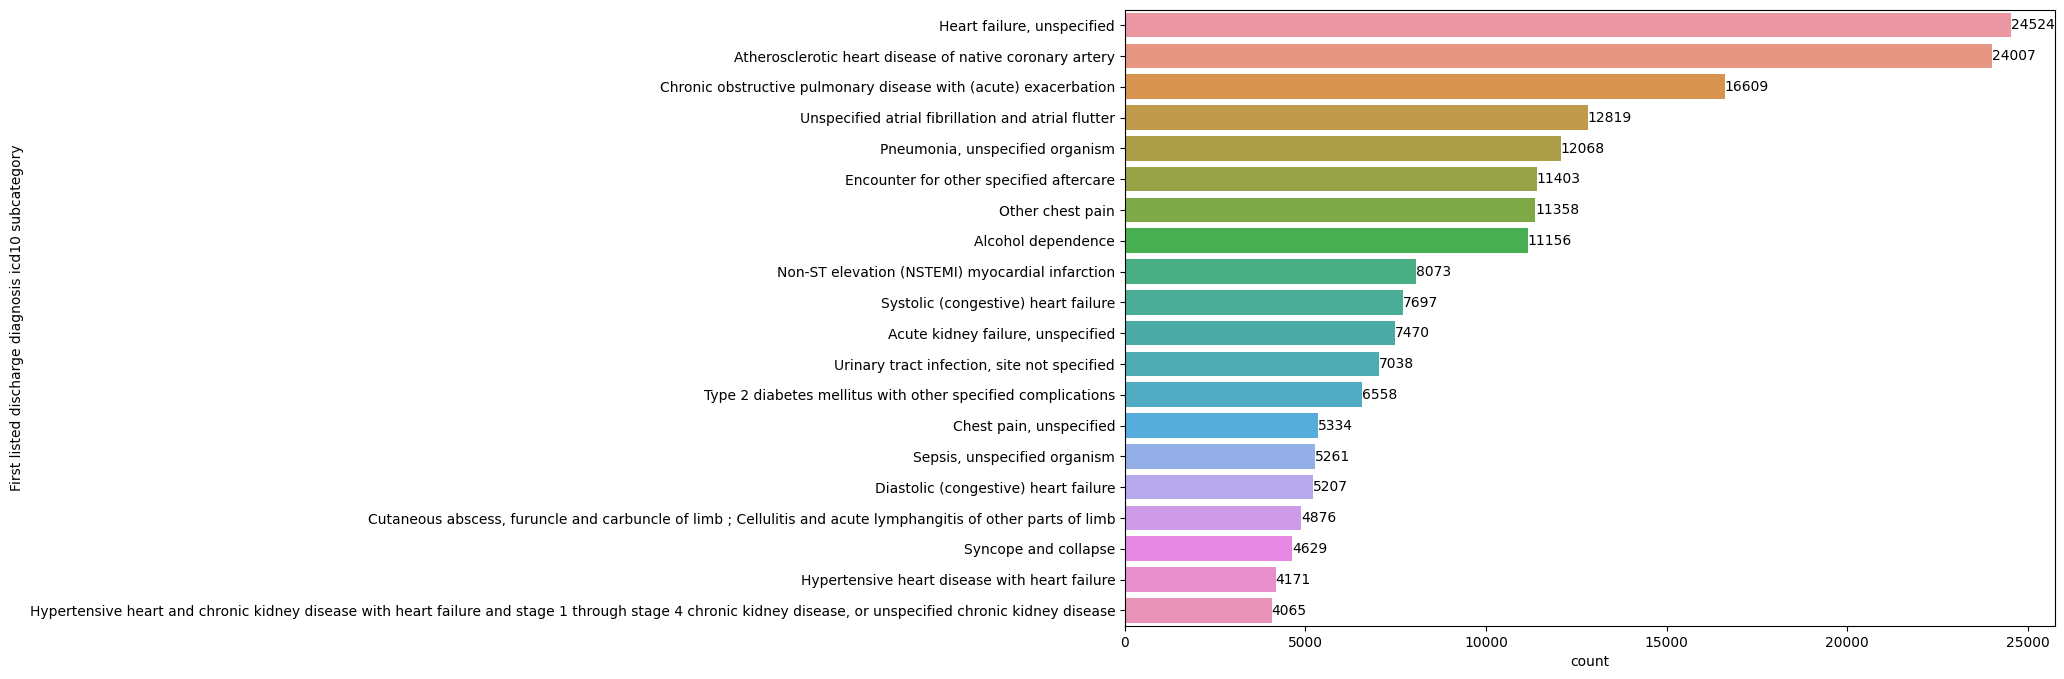

In [40]:
# Generate a frequency table of the categorical variable
freq_table = df['First listed discharge diagnosis icd10 subcategory'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Plot the frequency table using Seaborn's countplot function
ax = sns.countplot(y='First listed discharge diagnosis icd10 subcategory', data=df, order=freq_table.index[:20])

# Add count labels to the bars
for i, count in enumerate(freq_table[:20]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

- There are 3816 unique icd10 subcategories for the first listed discharge diagnosis, indicating that patients are being discharged with a wide range of medical conditions or diagnoses.

- **"Heart failure" is the top discharge diagnosis with 24524 occurrences.**

### Second listed discharge diagnosis icd10 subcategory (4057)

In [41]:
df['Second listed discharge diagnosis icd10 subcategory'].nunique()

4057

In [42]:
df_second_icd10 = df['Second listed discharge diagnosis icd10 subcategory'].value_counts().to_frame()

In [43]:
df_second_icd10 = df_second_icd10.reset_index()

In [44]:
df_second_icd10.columns=['Second listed discharge diagnosis icd10 subcategory','counts for second_icd10']
df_second_icd10.head(20)

,Second listed discharge diagnosis icd10 subcategory,counts for second_icd10
0,"Acute kidney failure, unspecified",17845
1,Atherosclerotic heart disease of native corona...,17810
2,Essential (primary) hypertension,17579
3,"Heart failure, unspecified",16746
4,Unspecified atrial fibrillation and atrial flu...,15298
5,Systolic (congestive) heart failure,14323
6,Not specified,13441
7,"Chronic obstructive pulmonary disease, unspeci...",12113
8,Diastolic (congestive) heart failure,11659
9,End stage renal disease,11465


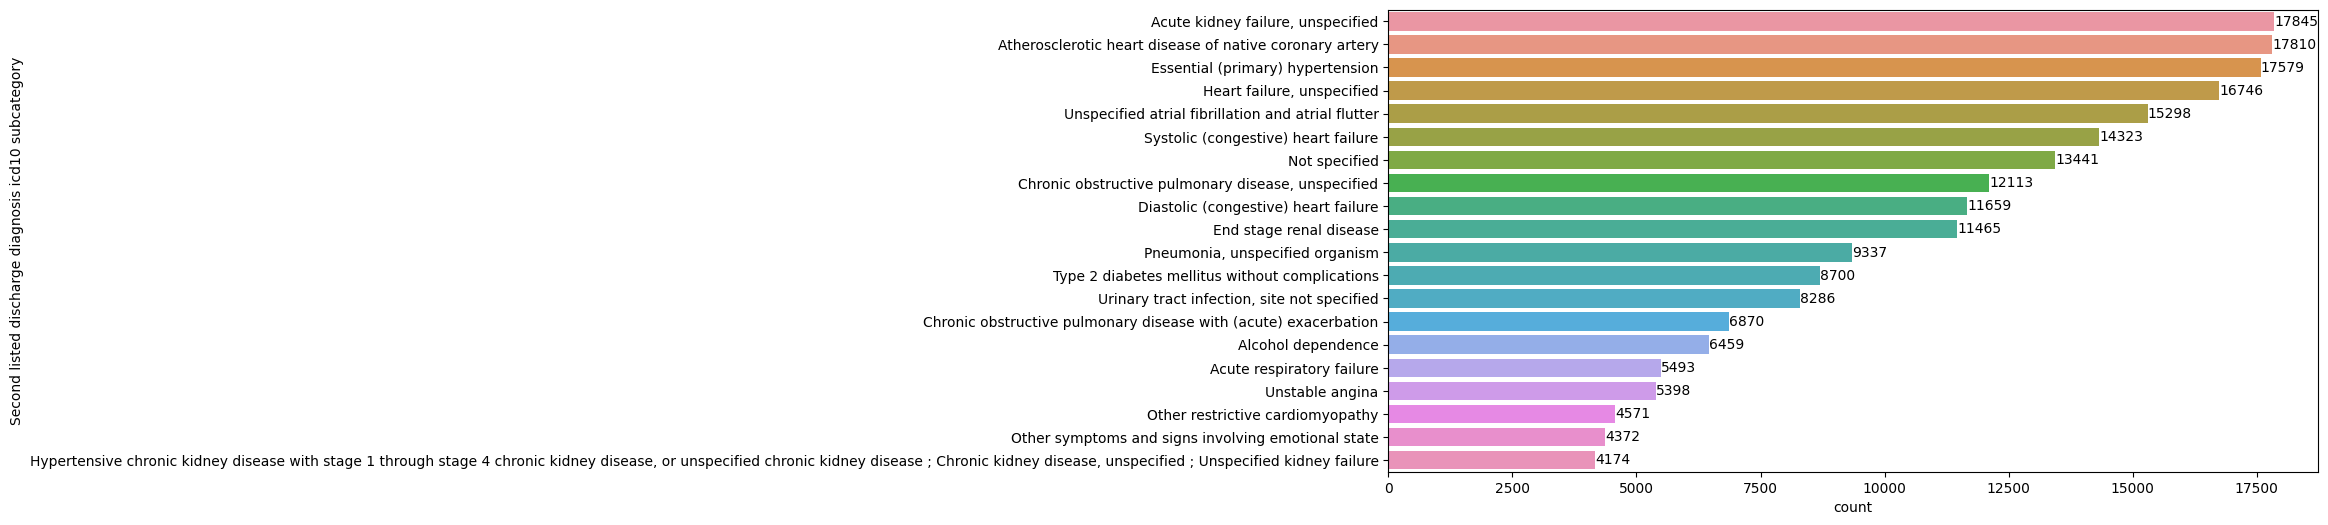

In [45]:
# Generate a frequency table of the categorical variable
freq_table = df['Second listed discharge diagnosis icd10 subcategory'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the frequency table using Seaborn's countplot function
ax = sns.countplot(y='Second listed discharge diagnosis icd10 subcategory', data=df, order=freq_table.index[:20])

# Add count labels to the bars
for i, count in enumerate(freq_table[:20]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

- There are 4057 unique icd10 subcategories for the second listed discharge diagnosis, which may suggest that some patients have multiple medical conditions or diagnoses that need to be addressed during their hospital stay.

- "Acute kidney failure, unspecified" is the top discharge diagnosis with 17845 occurrences and 2nd top is **Atherosclerotic heart disease of native coronary artery 17810 occurrences.**  

### Discharge disposition (7)

In [46]:
df['Discharge disposition'].nunique()

7

In [47]:
df['Discharge disposition'].value_counts()

Regular                     482223
Death without autopsy        14823
Transfer                     12092
Irregular                     9885
NBC or while ASIH             2270
Death with autopsy             951
Not specified (no value)       496
Name: Discharge disposition, dtype: int64

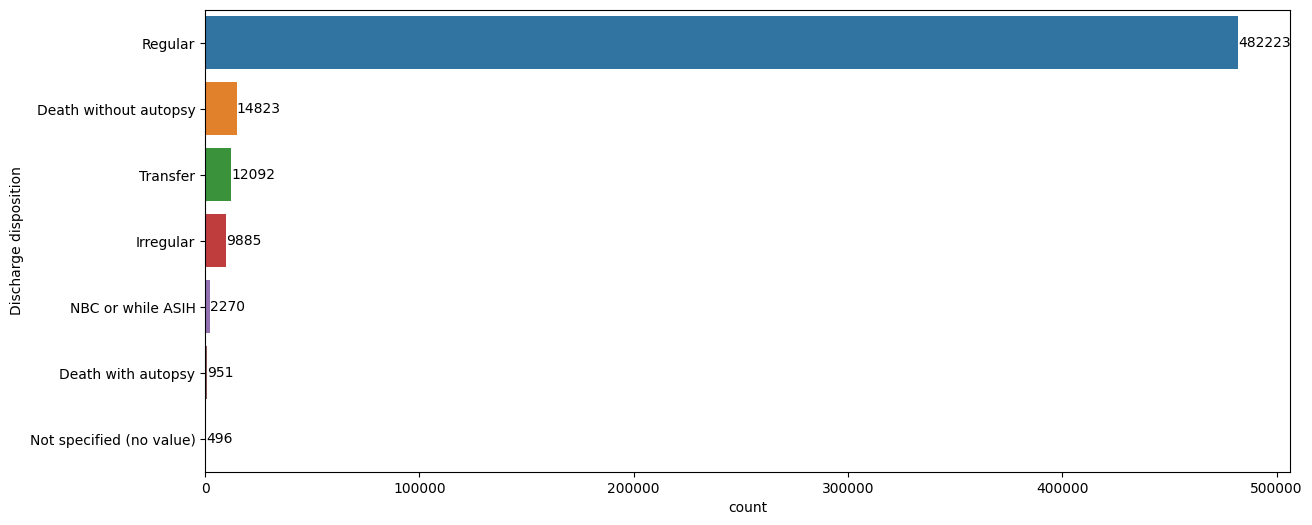

In [48]:
# Generate a frequency table of the categorical variable
freq_table = df['Discharge disposition'].value_counts()

# Set the figure size
plt.figure(figsize=(14, 6))  # Adjust the width and height as needed

# Plot the frequency table using Seaborn's countplot function
ax = sns.countplot(y='Discharge disposition', data=df, order=freq_table.index[:])

# Add count labels to the bars
for i, count in enumerate(freq_table[:]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

- The Discharge disposition column has 7 unique values, with Regular being the most common disposition (occurring 482223 times).

# Yes/No

### Died during admission

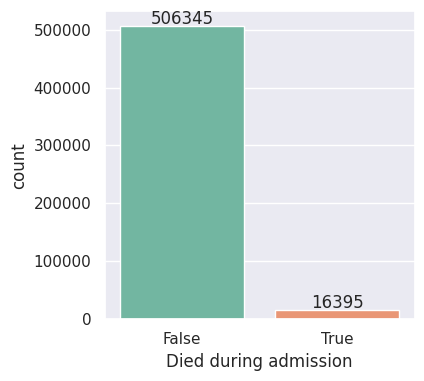

In [49]:
sns.set(style="darkgrid")

# Set a smaller figure size
plt.figure(figsize=(4, 4))

# Specify a color palette
colors = sns.color_palette('Set2')  # You can choose any palette you prefer

ax = sns.countplot(x='Died during admission', data=df, palette=colors)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels())

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**All patients who died during admission are present in the Death file.**

### Outpatientreferralflag

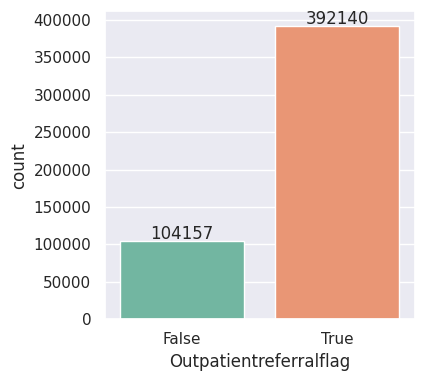

In [59]:
# Set the seaborn style
sns.set(style="darkgrid")

# Set a smaller figure size
plt.figure(figsize=(4, 4))

# Specify a color palette
colors = sns.color_palette('Set2')  # You can choose any palette you prefer

ax = sns.countplot(x='Outpatientreferralflag', data=df, palette=colors)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels())

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


- The Outpatientreferralflag column has two unique values, with 'Yes' being the most common (occurring 392140 times).

### Serviceconnectedflag

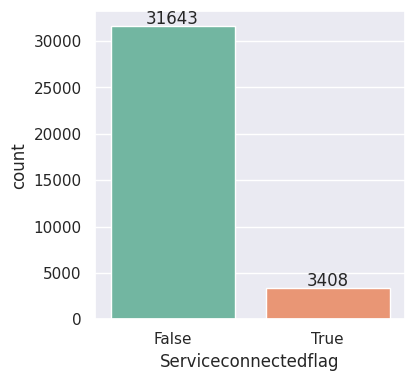

In [60]:
sns.set(style="darkgrid")

# Set a smaller figure size
plt.figure(figsize=(4, 4))

# Specify a color palette
colors = sns.color_palette('Set2')  # You can choose any palette you prefer

ax = sns.countplot(x='Serviceconnectedflag', data=df, palette=colors)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels())

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- The Serviceconnectedflag column also has two unique values, with 'No' being the most common (occurring 31643 times).



### Agentorangeflag

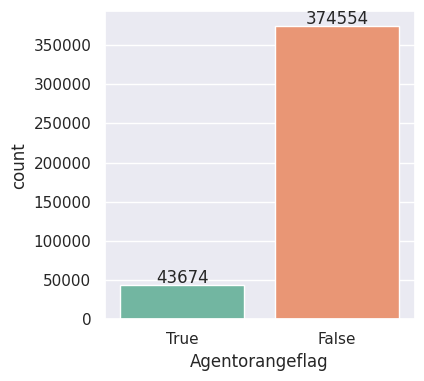

In [61]:
sns.set(style="darkgrid")

# Set a smaller figure size
plt.figure(figsize=(4, 4))

# Specify a color palette
colors = sns.color_palette('Set2')  # You can choose any palette you prefer

ax = sns.countplot(x='Agentorangeflag', data=df, palette=colors)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels())

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- The Agentorangeflag column has two unique values, with 'No' being the most common (occurring 374554 times).

### State

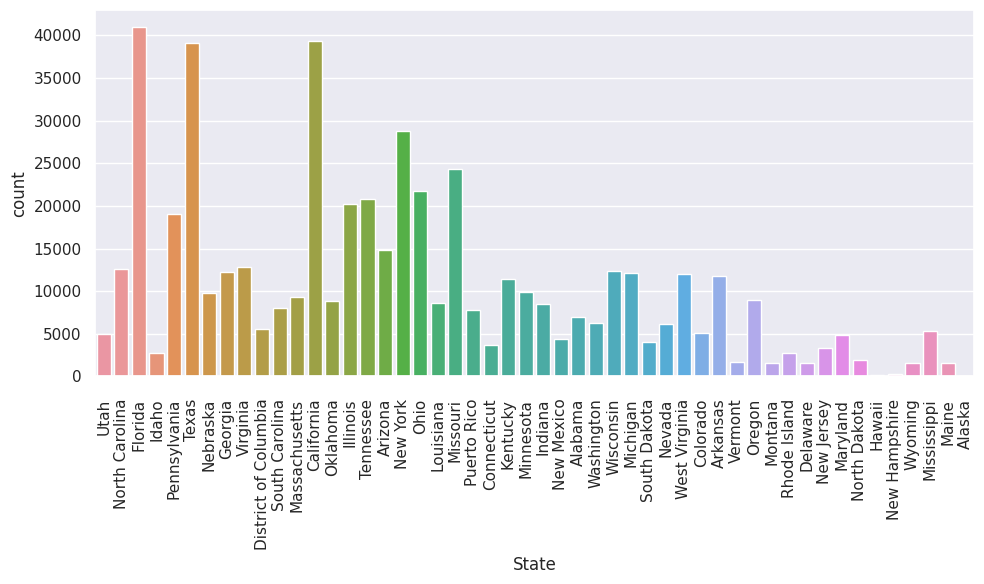

In [62]:
# Increase the figure size
plt.figure(figsize=(10, 6))

sns.set(style="darkgrid")
ax = sns.countplot(x='State', data=df)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust spacing
ax.tick_params(axis='x', which='major', pad=10)

plt.tight_layout()
plt.show()

- The majority of patients were from **Florida,** with a total of **40922 patients.** The dataset also includes a breakdown of patients by state. 

### Age at Inpatient Admission

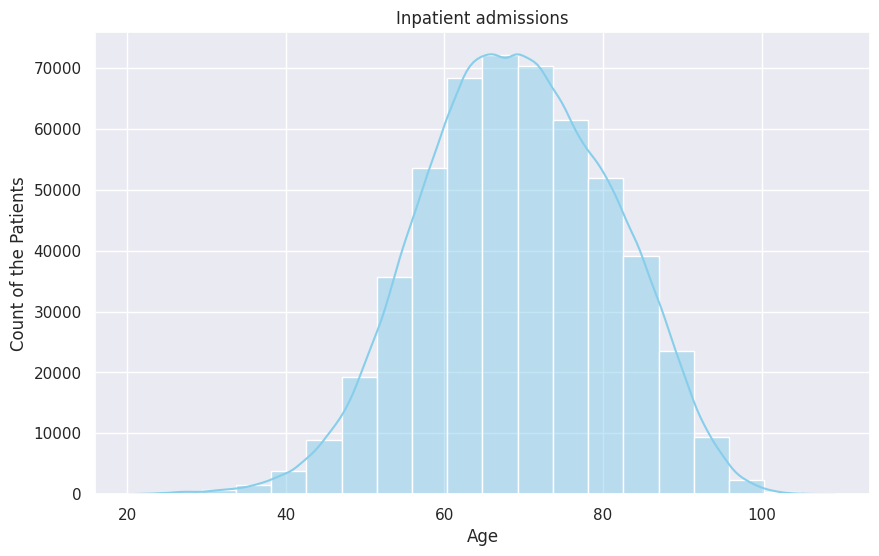

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age at admission'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count of the Patients')
plt.title('Inpatient admissions')
sns.set(style="darkgrid")
plt.grid(True)
plt.show()


### Internalpatientid

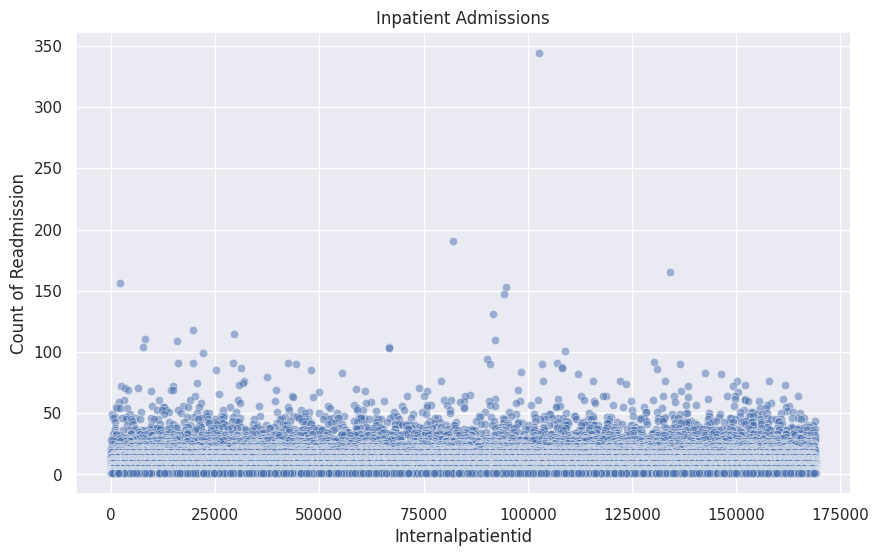

In [22]:
# Assuming 'df' is your DataFrame

# Count occurrences of each 'Internalpatientid'
patientid_counts = df['Internalpatientid'].value_counts().reset_index()
patientid_counts.columns = ['Internalpatientid', 'Count']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Internalpatientid', y='Count', data=patientid_counts, alpha=0.5)
plt.xlabel('Internalpatientid')
plt.ylabel('Count of Readmission')
plt.title('Inpatient Admissions')
sns.set(style="darkgrid")
plt.grid(True)
plt.show()

---

## 6. Age-Based Bucketing for Listed Diagnosis ICD10 Subcategory Aggregation and Grouping

In [69]:
# Drop the specified columns from the DataFrame
df.drop(['Admission date','Discharge date','Admitting unit service','Discharging unit service','Admitting specialty','Discharging specialty','Discharge disposition', 'Died during admission', 'Outpatientreferralflag','Serviceconnectedflag','Agentorangeflag','State', 'Admitting_Discharging_unit_service'], axis=1,inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522740 entries, 0 to 522739
Data columns (total 4 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Internalpatientid                                    522740 non-null  int64  
 1   Age at admission                                     522740 non-null  float64
 2   First listed discharge diagnosis icd10 subcategory   522740 non-null  object 
 3   Second listed discharge diagnosis icd10 subcategory  522740 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ MB


In [71]:
# changing variable name for dataframe
inpatient_admissions = df

In [72]:
inpatient_admissions.head()

,Internalpatientid,Age at admission,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory
0,10,65.649075,"Pneumonia, unspecified organism",Hypokalemia
1,100001,83.767138,"Pneumonia, unspecified organism",Essential (primary) hypertension
2,100001,84.873295,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...
3,10001,70.900369,Nonrheumatic mitral (valve) prolapse,Postprocedural shock
4,100016,83.054993,"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...


In [73]:
inpatient_admissions.describe()

,Internalpatientid,Age at admission
count,522740.000000,522740.000000
mean,84807.692788,69.176296
std,48932.437885,11.868582
min,1.000000,20.399133
25%,42251.500000,60.852513
50%,85375.500000,69.079457
75%,127134.000000,77.821331
max,169064.000000,109.224928


In [74]:
# Define the age ranges
age_ranges = [(20, 29.9),(30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9),(70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 109.9)] 

# Loop over each age range and assign ICD10 values to corresponding columns
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_first_icd10'
    second_range_label = f'{range_start}-{range_end}_second_icd10'
    
    # Assign first ICD10 values for each age range
    inpatient_admissions[range_label] = inpatient_admissions.apply(
        lambda row: row['First listed discharge diagnosis icd10 subcategory'] if range_start <= row['Age at admission'] <= range_end else None,
        axis=1
    )
    
    # Assign second ICD10 values for each age range
    inpatient_admissions[second_range_label] = inpatient_admissions.apply(
        lambda row: row['Second listed discharge diagnosis icd10 subcategory'] if range_start <= row['Age at admission'] <= range_end else None,
        axis=1
    )
    
# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values
df_grouped = inpatient_admissions.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped.head()

# Reset the index of the grouped DataFrame
df_grouped = df_grouped.reset_index()

# Display the updated DataFrame with reset index
df_grouped


,Internalpatientid,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,20-29.9_first_icd10,20-29.9_second_icd10,30.0-39.9_first_icd10,30.0-39.9_second_icd10,40.0-49.9_first_icd10,40.0-49.9_second_icd10,50.0-59.9_first_icd10,...,60.0-69.9_first_icd10,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,90.0-99.9_first_icd10,90.0-99.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10
0,1,"Contusion of hip,Unspecified atrial fibrillati...",Unspecified atrial fibrillation and atrial flu...,,,,,,,,...,Unspecified atrial fibrillation and atrial flu...,"Essential (primary) hypertension,Essential (pr...","Contusion of hip,Malignant neoplasm of bladder...",Unspecified atrial fibrillation and atrial flu...,,,,,,
1,2,"Other chest pain,Non-ST elevation (NSTEMI) myo...","Paranoid schizophrenia,Coronary artery aneurys...",,,,,,,"Other chest pain,Unspecified convulsions,Other...",...,Non-ST elevation (NSTEMI) myocardial infarctio...,"Coronary artery aneurysm and dissection,Unspec...",,,,,,,,
2,3,"Heart failure, unspecified,Encounter for other...",Type 2 diabetes mellitus without complications...,,,,,,,,...,,,"Heart failure, unspecified",Type 2 diabetes mellitus without complications,Encounter for other specified aftercare,Acquired absence of leg below knee,,,,
3,4,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,,,,,,,,...,,,,,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,,,,
4,5,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",,,,,,,,...,,,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84531,169055,ST elevation (STEMI) myocardial infarction of ...,Atherosclerotic heart disease of native corona...,,,,,,,ST elevation (STEMI) myocardial infarction of ...,...,,,,,,,,,,
84532,169057,"Tubulo-interstitial nephritis, not specified a...","Inflammatory disease of prostate, unspecified,...",,,,,,,,...,,,"Tubulo-interstitial nephritis, not specified a...","Inflammatory disease of prostate, unspecified,...","Hypertensive heart disease with heart failure,...","Acute kidney failure, unspecified,Monoplegia o...",,,,
84533,169060,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,,,,,,,Unspecified atrial fibrillation and atrial flu...,...,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,,,,,,
84534,169062,"Encounter for other specified aftercare,Chroni...","Malignant neoplasm of sigmoid colon,Hypovolemi...",,,,,,,,...,,,"Encounter for other specified aftercare,Chroni...","Malignant neoplasm of sigmoid colon,Hypovolemi...",,,,,,


In [75]:
# shape for grouped data
df_grouped.shape 

num_rows = df_grouped.shape[0]  # Number of rows
num_cols = df_grouped.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 84536
Number of columns: 21


In [76]:
# Get the number of unique values in the 'Internalpatientid' column
print("Unique df_grouped Internalpatientid")
df_grouped.Internalpatientid.nunique()

Unique df_grouped Internalpatientid


84536

In [77]:
# Checking all row values of 'Internalpatientid']==169060
inpatient_admissions[inpatient_admissions['Internalpatientid']==169060]

,Internalpatientid,Age at admission,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,20-29.9_first_icd10,20-29.9_second_icd10,30.0-39.9_first_icd10,30.0-39.9_second_icd10,40.0-49.9_first_icd10,40.0-49.9_second_icd10,...,60.0-69.9_first_icd10,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,90.0-99.9_first_icd10,90.0-99.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10
77647,169060,71.005351,Diastolic (congestive) heart failure,Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None,...,None,None,Diastolic (congestive) heart failure,Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None
177007,169060,71.291995,"Heart failure, unspecified",Hypo-osmolality and hyponatremia,None,None,None,None,None,None,...,None,None,"Heart failure, unspecified",Hypo-osmolality and hyponatremia,None,None,None,None,None,None
205952,169060,71.076239,"Heart failure, unspecified",Not specified,None,None,None,None,None,None,...,None,None,"Heart failure, unspecified",Not specified,None,None,None,None,None,None
218911,169060,69.500962,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None,...,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None,None,None
221257,169060,56.939978,Unspecified atrial fibrillation and atrial flu...,Atherosclerotic heart disease of native corona...,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
221258,169060,59.978872,Unspecified atrial fibrillation and atrial flu...,Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
225883,169060,57.323849,Unspecified atrial fibrillation and atrial flu...,Acute pancreatitis,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
419133,169060,71.138932,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None,...,None,None,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,None,None,None,None,None,None


In [78]:
# Checking bucketing row values of 'Internalpatientid']==169060
df_grouped[df_grouped['Internalpatientid']==169060]

,Internalpatientid,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,20-29.9_first_icd10,20-29.9_second_icd10,30.0-39.9_first_icd10,30.0-39.9_second_icd10,40.0-49.9_first_icd10,40.0-49.9_second_icd10,50.0-59.9_first_icd10,...,60.0-69.9_first_icd10,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,90.0-99.9_first_icd10,90.0-99.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10
84533,169060,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,,,,,,,Unspecified atrial fibrillation and atrial flu...,...,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,,,,,,


In [79]:
# Checking row values if it is correctly printed like A, B, C...
column_value = df_grouped['70.0-79.9_second_icd10'].values[0]
print(column_value)

Unspecified atrial fibrillation and atrial flutter,Other intraoperative and postprocedural complications and disorders of genitourinary system


### Checking Missing Values for Grouped columns

In [80]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = df_grouped.isnull().sum()

# Get the total number of rows in the DataFrame
total_rows = df_grouped.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame summarizing the missing values per column
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

# Print the missing values summary per column
print("Missing values summary per column:")
missing_data_summary


Missing values summary per column:


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
First listed discharge diagnosis icd10 subcategory,0,0.000000
Second listed discharge diagnosis icd10 subcategory,0,0.000000
20-29.9_first_icd10,84379,99.814280
20-29.9_second_icd10,84379,99.814280
30.0-39.9_first_icd10,83560,98.845462
30.0-39.9_second_icd10,83560,98.845462
40.0-49.9_first_icd10,78722,93.122457
40.0-49.9_second_icd10,78722,93.122457
50.0-59.9_first_icd10,63493,75.107646


---

## 7. Exploring the Death file

In [81]:
df_death.head()

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06


In [82]:
# Shape of the dataset
df_death.shape
num_rows = df_death.shape[0]  # Number of rows
num_cols = df_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 97284
Number of columns: 4


In [83]:
# Assigning a value of 1 to a new column 'death' in df_death dataframe
df_death['death'] = 1
df_death.head()

,Column1,Internalpatientid,Age at death,Death date,death
0,0,100036,72.412770,2015-01-18 20:49:10,1
1,1,100037,75.241135,2008-10-16 15:14:26,1
2,2,100045,85.399403,2019-01-26 11:33:52,1
3,3,100095,84.136551,2004-08-10 21:49:35,1
4,6,10013,68.372126,2007-06-11 00:17:06,1


In [84]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Column1            97284 non-null  int64         
 1   Internalpatientid  97284 non-null  int64         
 2   Age at death       97284 non-null  float64       
 3   Death date         97284 non-null  datetime64[ns]
 4   death              97284 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.7 MB


In [85]:
# Dropping the specified columns from df_death dataframe
df_death = df_death.drop(['Column1', 'Age at death', 'Death date'], axis=1)

In [86]:
df_death.head()

,Internalpatientid,death
0,100036,1
1,100037,1
2,100045,1
3,100095,1
4,10013,1


## Merging Inpatient admissions Grouped Columns and Death File with Left Join on using Internalpatientid

In [87]:
# merging Inpatient admissions grouped columns and death file with Left join on using Internalpatientid
merge_inpatient_admission_death = pd.merge(df_grouped, df_death, how='left',on='Internalpatientid')

In [88]:
# Shape of the merged dataset
merge_inpatient_admission_death.shape   # it will have both death and alive for inpatient admission data
num_rows = merge_inpatient_admission_death.shape[0]  # Number of rows
num_cols = merge_inpatient_admission_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 84536
Number of columns: 22


In [89]:
merge_inpatient_admission_death.head()

,Internalpatientid,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,20-29.9_first_icd10,20-29.9_second_icd10,30.0-39.9_first_icd10,30.0-39.9_second_icd10,40.0-49.9_first_icd10,40.0-49.9_second_icd10,50.0-59.9_first_icd10,...,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,90.0-99.9_first_icd10,90.0-99.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10,death
0,1,"Contusion of hip,Unspecified atrial fibrillati...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Essential (primary) hypertension,Essential (pr...","Contusion of hip,Malignant neoplasm of bladder...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Other chest pain,Non-ST elevation (NSTEMI) myo...","Paranoid schizophrenia,Coronary artery aneurys...",NaN,NaN,NaN,NaN,NaN,NaN,"Other chest pain,Unspecified convulsions,Other...",...,"Coronary artery aneurysm and dissection,Unspec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Heart failure, unspecified,Encounter for other...",Type 2 diabetes mellitus without complications...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Heart failure, unspecified",Type 2 diabetes mellitus without complications,Encounter for other specified aftercare,Acquired absence of leg below knee,NaN,NaN,NaN,NaN,1.0
3,4,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,NaN,NaN,NaN,NaN,1.0
4,5,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Not_death_patients

In [90]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
merge_inpatient_admission_death['death'] = merge_inpatient_admission_death['death'].fillna(0).astype(int)

In [91]:
# Filter the dataset for rows where the 'death' column is 0 (not death)
not_death_patients = merge_inpatient_admission_death[merge_inpatient_admission_death['death'] == 0]
not_death_patients

,Internalpatientid,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,20-29.9_first_icd10,20-29.9_second_icd10,30.0-39.9_first_icd10,30.0-39.9_second_icd10,40.0-49.9_first_icd10,40.0-49.9_second_icd10,50.0-59.9_first_icd10,...,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,90.0-99.9_first_icd10,90.0-99.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10,death
0,1,"Contusion of hip,Unspecified atrial fibrillati...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Essential (primary) hypertension,Essential (pr...","Contusion of hip,Malignant neoplasm of bladder...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,"Other chest pain,Non-ST elevation (NSTEMI) myo...","Paranoid schizophrenia,Coronary artery aneurys...",NaN,NaN,NaN,NaN,NaN,NaN,"Other chest pain,Unspecified convulsions,Other...",...,"Coronary artery aneurysm and dissection,Unspec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,8,"Osteomyelitis, unspecified",Unspecified dementia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified dementia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,11,"Major depressive disorder, single episode, uns...","Post-traumatic stress disorder (PTSD),Major de...",NaN,NaN,NaN,NaN,NaN,NaN,"Major depressive disorder, single episode, uns...",...,"Essential (primary) hypertension,Type 2 diabet...",Unspecified bacterial pneumonia,"Acute kidney failure, unspecified",NaN,NaN,NaN,NaN,NaN,NaN,0
8,13,"Poisoning by, adverse effect of and underdosin...","Diastolic (congestive) heart failure,Unspecifi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Poisoning by, adverse effect of and underdosin...","Diastolic (congestive) heart failure,Unspecifi...",NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84513,169014,"Abscess of epididymis or testis,Unspecified mo...",Other specified disorders of male genital orga...,NaN,NaN,NaN,NaN,NaN,NaN,"Unspecified mood [affective] disorder,Unspecif...",...,Other specified disorders of male genital orga...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
84514,169016,"Other chest pain,Other chest pain,Asphyxia and...","Migraine, unspecified,Essential (primary) hype...",NaN,NaN,NaN,NaN,"Other chest pain,Chronic migraine without aura","Essential (primary) hypertension,Epilepsy, uns...","Other chest pain,Asphyxia and hypoxemia,Orthos...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
84525,169041,"Acute cholecystitis,Calculus of gallbladder wi...",Hypertensive chronic kidney disease with stage...,NaN,NaN,NaN,NaN,"Acute cholecystitis,Calculus of gallbladder wi...",Hypertensive chronic kidney disease with stage...,Unspecified atrial fibrillation and atrial flu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
84527,169047,Other viral agents as the cause of diseases cl...,"Cervicalgia,Pneumonia, unspecified organism,Es...",NaN,NaN,NaN,NaN,NaN,NaN,Other viral agents as the cause of diseases cl...,...,"Pneumonia, unspecified organism,Diastolic (con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [92]:
 # Shape of the merged dataset
not_death_patients.shape   # it will have only alive patients
num_rows = not_death_patients.shape[0]  # Number of rows
num_cols = not_death_patients.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 23528
Number of columns: 22


In [93]:
not_death_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23528 entries, 0 to 84532
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Internalpatientid                                    23528 non-null  int64 
 1   First listed discharge diagnosis icd10 subcategory   23528 non-null  object
 2   Second listed discharge diagnosis icd10 subcategory  23528 non-null  object
 3   20-29.9_first_icd10                                  127 non-null    object
 4   20-29.9_second_icd10                                 127 non-null    object
 5   30.0-39.9_first_icd10                                670 non-null    object
 6   30.0-39.9_second_icd10                               670 non-null    object
 7   40.0-49.9_first_icd10                                3078 non-null   object
 8   40.0-49.9_second_icd10                               3078 non-null   object


### Death_patients

In [94]:
# Extracting death patients from the dataset
death_patients = merge_inpatient_admission_death[merge_inpatient_admission_death['death']==1]
death_patients

,Internalpatientid,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,20-29.9_first_icd10,20-29.9_second_icd10,30.0-39.9_first_icd10,30.0-39.9_second_icd10,40.0-49.9_first_icd10,40.0-49.9_second_icd10,50.0-59.9_first_icd10,...,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,90.0-99.9_first_icd10,90.0-99.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10,death
2,3,"Heart failure, unspecified,Encounter for other...",Type 2 diabetes mellitus without complications...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Heart failure, unspecified",Type 2 diabetes mellitus without complications,Encounter for other specified aftercare,Acquired absence of leg below knee,NaN,NaN,NaN,NaN,1
3,4,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,NaN,NaN,NaN,NaN,1
4,5,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",NaN,NaN,NaN,NaN,NaN,NaN,1
6,10,"Pneumonia, unspecified organism",Hypokalemia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hypokalemia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,15,"Ventral hernia,Hypertensive heart disease with...","Umbilical hernia with obstruction, without gan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Umbilical hernia with obstruction, without gan...",NaN,NaN,"Hypertensive heart disease with heart failure,...","Systolic (congestive) heart failure,Systolic (...",NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84530,169053,"Encounter for other specified aftercare,Other ...","Hemiplegia, unspecified,Pleural effusion, not ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Encounter for other specified aftercare,Alcoho...","Hemiplegia, unspecified,Adjustment disorders,D...","Other and unspecified encephalopathy,Adult fai...","Pleural effusion, not elsewhere classified,Uns...",NaN,NaN,NaN,NaN,1
84531,169055,ST elevation (STEMI) myocardial infarction of ...,Atherosclerotic heart disease of native corona...,NaN,NaN,NaN,NaN,NaN,NaN,ST elevation (STEMI) myocardial infarction of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84533,169060,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified atrial fibrillation and atrial flu...,...,Unspecified atrial fibrillation and atrial flu...,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,NaN,NaN,1
84534,169062,"Encounter for other specified aftercare,Chroni...","Malignant neoplasm of sigmoid colon,Hypovolemi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Encounter for other specified aftercare,Chroni...","Malignant neoplasm of sigmoid colon,Hypovolemi...",NaN,NaN,NaN,NaN,NaN,NaN,1


In [95]:
# Shape of the merged dataset
death_patients.shape   # it will have only death patients
num_rows = death_patients.shape[0]  # Number of rows
num_cols = death_patients.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 61008
Number of columns: 22


In [96]:
death_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61008 entries, 2 to 84535
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Internalpatientid                                    61008 non-null  int64 
 1   First listed discharge diagnosis icd10 subcategory   61008 non-null  object
 2   Second listed discharge diagnosis icd10 subcategory  61008 non-null  object
 3   20-29.9_first_icd10                                  30 non-null     object
 4   20-29.9_second_icd10                                 30 non-null     object
 5   30.0-39.9_first_icd10                                306 non-null    object
 6   30.0-39.9_second_icd10                               306 non-null    object
 7   40.0-49.9_first_icd10                                2736 non-null   object
 8   40.0-49.9_second_icd10                               2736 non-null   object


### Counting for Death and Alive Patients

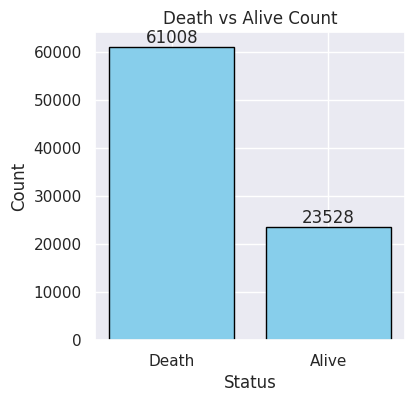

In [100]:
count = merge_inpatient_admission_death['death']

# Count the occurrences of each category
value_counts = count.value_counts()

# Create a bar plot
plt.figure(figsize=(4, 4))
bars = plt.bar(['Death', 'Alive'], [value_counts[1], value_counts[0]], edgecolor='black', color=['skyblue', 'skyblue'])

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(height), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Death vs Alive Count')
plt.grid(True)  # Add grid lines
plt.show()

### Checking Missing Values for Death_patients

In [92]:
# Replace blank values with NaN
death_patients.replace('', np.nan, inplace=True)

missing_values_count = death_patients.isnull().sum()
total_rows = death_patients.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
First listed discharge diagnosis icd10 subcategory,0,0.000000
Second listed discharge diagnosis icd10 subcategory,0,0.000000
20-29.9_first_icd10,60978,99.950826
20-29.9_second_icd10,60978,99.950826
30.0-39.9_first_icd10,60702,99.498426
30.0-39.9_second_icd10,60702,99.498426
40.0-49.9_first_icd10,58272,95.515342
40.0-49.9_second_icd10,58272,95.515342
50.0-59.9_first_icd10,48685,79.801010


---

### Comparing missing value percentage with 'death_patients' and 'df_grouped'

In [93]:
# Calculate missing values count and percentage for df_grouped
grouped_missing_values_count = df_grouped.isnull().sum()
grouped_missing_percentage = (grouped_missing_values_count / df_grouped.shape[0]) * 100

# Calculate missing values count and percentage for death_patients
death_missing_values_count = death_patients.isnull().sum()
death_missing_percentage = (death_missing_values_count / death_patients.shape[0]) * 100

# Calculate the difference in missing values percentage between grouped data and death patients
missing_percentage_difference = grouped_missing_percentage - death_missing_percentage

# Format the 'Missing Values Count (Grouped Data)' column values with leading zeros
grouped_missing_values_count_formatted = grouped_missing_values_count.map('{:01d}'.format)

# Create a DataFrame for the missing values summary
missing_data_summary = pd.DataFrame({
    'Missing Values Count (Grouped Data) 84536 ': grouped_missing_values_count_formatted,
    'Missing Values Percentage (Grouped Data)': grouped_missing_percentage.map('{:.2f}%'.format),
    'Missing Values Count (Death Patients) 61008': death_missing_values_count,
    'Missing Values Percentage (Death Patients)': death_missing_percentage.map('{:.2f}%'.format),
    'Difference in Missing Values Percentage': missing_percentage_difference.map('{:.2f}%'.format)
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


,Missing Values Count (Grouped Data) 84536,Missing Values Percentage (Grouped Data),Missing Values Count (Death Patients) 61008,Missing Values Percentage (Death Patients),Difference in Missing Values Percentage
100.0-109.9_first_icd10,84377,99.81%,60867,99.77%,0.04%
100.0-109.9_second_icd10,84377,99.81%,60867,99.77%,0.04%
20-29.9_first_icd10,84379,99.81%,60978,99.95%,-0.14%
20-29.9_second_icd10,84379,99.81%,60978,99.95%,-0.14%
30.0-39.9_first_icd10,83560,98.85%,60702,99.50%,-0.65%
30.0-39.9_second_icd10,83560,98.85%,60702,99.50%,-0.65%
40.0-49.9_first_icd10,78722,93.12%,58272,95.52%,-2.39%
40.0-49.9_second_icd10,78722,93.12%,58272,95.52%,-2.39%
50.0-59.9_first_icd10,63493,75.11%,48685,79.80%,-4.69%
50.0-59.9_second_icd10,63493,75.11%,48685,79.80%,-4.69%


- The columns 
  - **'20-29.9_first_icd10' and '20-29.9_second_icd10'** 
  - **'30.0-39.9_first_icd10' and '30.0-39.9_second_icd10'**
  - **'40.0-49.9_first_icd10' and '40.0-49.9_second_icd10'**
  - **'50.0-59.9_first_icd10' and '50.0-59.9_second_icd10'**
  - **'90.0-99.9_first_icd10' and '90.0-99.9_second_icd10** have the highest missing values percentage in both the grouped data and death patients. 
- The missing values percentage for these columns is approximately more than **70%** in the grouped data and death patients.

In [94]:
# dropping columns that have a large number of missing values.
columns_to_drop = ['20-29.9_first_icd10', '20-29.9_second_icd10', '30.0-39.9_first_icd10', '30.0-39.9_second_icd10', 
                   '40.0-49.9_first_icd10', '40.0-49.9_second_icd10', '50.0-59.9_first_icd10', '50.0-59.9_second_icd10', 
                   '90.0-99.9_first_icd10', '90.0-99.9_second_icd10']

df_death_patients = death_patients.drop(columns=columns_to_drop)

In [95]:
df_death_patients

,Internalpatientid,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,60.0-69.9_first_icd10,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10,death
2,3,"Heart failure, unspecified,Encounter for other...",Type 2 diabetes mellitus without complications...,NaN,NaN,"Heart failure, unspecified",Type 2 diabetes mellitus without complications,Encounter for other specified aftercare,Acquired absence of leg below knee,NaN,NaN,1
3,4,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,NaN,NaN,NaN,NaN,Acute gastric ulcer with hemorrhage,Non-ST elevation (NSTEMI) myocardial infarction,NaN,NaN,1
4,5,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",NaN,NaN,"Acute and subacute infective endocarditis,Cuta...","Acute respiratory failure,Heart failure, unspe...",NaN,NaN,NaN,NaN,1
6,10,"Pneumonia, unspecified organism",Hypokalemia,"Pneumonia, unspecified organism",Hypokalemia,NaN,NaN,NaN,NaN,NaN,NaN,1
9,15,"Ventral hernia,Hypertensive heart disease with...","Umbilical hernia with obstruction, without gan...",Ventral hernia,"Umbilical hernia with obstruction, without gan...",NaN,NaN,"Hypertensive heart disease with heart failure,...","Systolic (congestive) heart failure,Systolic (...",NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84530,169053,"Encounter for other specified aftercare,Other ...","Hemiplegia, unspecified,Pleural effusion, not ...",NaN,NaN,"Encounter for other specified aftercare,Alcoho...","Hemiplegia, unspecified,Adjustment disorders,D...","Other and unspecified encephalopathy,Adult fai...","Pleural effusion, not elsewhere classified,Uns...",NaN,NaN,1
84531,169055,ST elevation (STEMI) myocardial infarction of ...,Atherosclerotic heart disease of native corona...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84533,169060,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,"Heart failure, unspecified",Unspecified atrial fibrillation and atrial flu...,"Diastolic (congestive) heart failure,Heart fai...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,1
84534,169062,"Encounter for other specified aftercare,Chroni...","Malignant neoplasm of sigmoid colon,Hypovolemi...",NaN,NaN,"Encounter for other specified aftercare,Chroni...","Malignant neoplasm of sigmoid colon,Hypovolemi...",NaN,NaN,NaN,NaN,1


---

## 8. Bivariate analysis for each column vs death

In [96]:
# Generating descriptive statistics for object columns in df_death_patients dataframe
df_death_patients.describe(include=['object'])

,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,60.0-69.9_first_icd10,60.0-69.9_second_icd10,70.0-79.9_first_icd10,70.0-79.9_second_icd10,80.0-89.9_first_icd10,80.0-89.9_second_icd10,100.0-109.9_first_icd10,100.0-109.9_second_icd10
count,61008,61008,22888,22888,26449,26449,19155,19155,141,141
unique,48153,48418,16722,16921,18831,18829,13769,13826,126,128
top,"Heart failure, unspecified","Heart failure, unspecified",Atherosclerotic heart disease of native corona...,Essential (primary) hypertension,"Heart failure, unspecified","Heart failure, unspecified","Heart failure, unspecified","Heart failure, unspecified","Heart failure, unspecified",Acute respiratory failure
freq,1067,811,450,368,524,390,435,317,5,4


### 60.0-69.9_first_icd10

In [97]:
df_death_patients['60.0-69.9_first_icd10'].value_counts().head(10)

Atherosclerotic heart disease of native coronary artery                                                            450
Heart failure, unspecified                                                                                         358
Unspecified atrial fibrillation and atrial flutter                                                                 217
Chronic obstructive pulmonary disease with (acute) exacerbation                                                    191
Pneumonia, unspecified organism                                                                                    162
Non-ST elevation (NSTEMI) myocardial infarction                                                                    123
Other chest pain                                                                                                   115
Encounter for other specified aftercare                                                                            110
Atherosclerotic heart disease of native coronary

**Reason for death:**

- The most common diagnosis within the "60.0-69.9_first_icd10" category is "Atherosclerotic heart disease of native coronary artery" with a count of 450. This condition appears to be prevalent among the patients.

- The second most frequent diagnosis is "Heart failure, unspecified" with a count of 358. This suggests that heart failure is a significant contributor to mortality in the dataset.

### 60.0-69.9_second_icd10

In [98]:
df_death_patients['60.0-69.9_second_icd10'].value_counts().head(10)

Essential (primary) hypertension                           368
Heart failure, unspecified                                 300
Atherosclerotic heart disease of native coronary artery    294
Not specified                                              260
Chronic obstructive pulmonary disease, unspecified         222
Unspecified atrial fibrillation and atrial flutter         182
Type 2 diabetes mellitus without complications             159
Acute kidney failure, unspecified                          133
Systolic (congestive) heart failure                        113
Pneumonia, unspecified organism                            108
Name: 60.0-69.9_second_icd10, dtype: int64

### 70.0-79.9_first_icd10

In [99]:
df_death_patients['70.0-79.9_first_icd10'].value_counts().head(20)

Heart failure, unspecified                                                                                         524
Atherosclerotic heart disease of native coronary artery                                                            329
Unspecified atrial fibrillation and atrial flutter                                                                 241
Pneumonia, unspecified organism                                                                                    228
Chronic obstructive pulmonary disease with (acute) exacerbation                                                    221
Encounter for other specified aftercare                                                                            201
Non-ST elevation (NSTEMI) myocardial infarction                                                                    146
Acute kidney failure, unspecified                                                                                  105
Other chest pain                                

### 70.0-79.9_second_icd10

In [100]:
df_death_patients['70.0-79.9_second_icd10'].value_counts().head(10)

Heart failure, unspecified                                 390
Unspecified atrial fibrillation and atrial flutter         330
Essential (primary) hypertension                           325
Atherosclerotic heart disease of native coronary artery    303
Chronic obstructive pulmonary disease, unspecified         265
Not specified                                              263
Acute kidney failure, unspecified                          193
Type 2 diabetes mellitus without complications             161
Pneumonia, unspecified organism                            144
Systolic (congestive) heart failure                        143
Name: 70.0-79.9_second_icd10, dtype: int64

### 80.0-89.9_first_icd10

In [101]:
df_death_patients['80.0-89.9_first_icd10'].value_counts().head(10)

Heart failure, unspecified                                         435
Pneumonia, unspecified organism                                    195
Unspecified atrial fibrillation and atrial flutter                 169
Encounter for other specified aftercare                            152
Atherosclerotic heart disease of native coronary artery            139
Non-ST elevation (NSTEMI) myocardial infarction                    139
Chronic obstructive pulmonary disease with (acute) exacerbation    119
Heart failure, unspecified,Heart failure, unspecified               93
Urinary tract infection, site not specified                         88
Acute kidney failure, unspecified                                   87
Name: 80.0-89.9_first_icd10, dtype: int64

### 80.0-89.9_second_icd10

In [102]:
df_death_patients['80.0-89.9_second_icd10'].value_counts().head(10)

Heart failure, unspecified                                 317
Unspecified atrial fibrillation and atrial flutter         257
Acute kidney failure, unspecified                          205
Pneumonia, unspecified organism                            168
Atherosclerotic heart disease of native coronary artery    156
Chronic obstructive pulmonary disease, unspecified         151
Essential (primary) hypertension                           136
Systolic (congestive) heart failure                        122
Not specified                                              119
Urinary tract infection, site not specified                117
Name: 80.0-89.9_second_icd10, dtype: int64

### 100.0-109.9_first_icd10'

In [103]:
df_death_patients['100.0-109.9_first_icd10'].value_counts().head(10)

Heart failure, unspecified                                                                                                                                    5
Urinary tract infection, site not specified                                                                                                                   3
Hypertensive heart and chronic kidney disease with heart failure and stage 1 through stage 4 chronic kidney disease, or unspecified chronic kidney disease    3
Pneumonitis due to inhalation of food and vomit                                                                                                               2
Acute respiratory failure                                                                                                                                     2
Pneumonia, unspecified organism                                                                                                                               2
Diastolic (congestive) heart failure    

### 100.0-109.9_second_icd10

In [104]:
df_death_patients['100.0-109.9_second_icd10'].value_counts().head(10)

Acute respiratory failure                                                                                                                                     4
Chronic obstructive pulmonary disease with (acute) exacerbation                                                                                               3
Systolic (congestive) heart failure                                                                                                                           3
Other type of myocardial infarction                                                                                                                           2
Pneumonia, unspecified organism                                                                                                                               2
Adult failure to thrive                                                                                                                                       2
Hypertensive heart and chronic kidney di

---

# Readmitted Patients Count

In [114]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'inpatient_admissions_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [115]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
inpatient_admissions= dataset.to_pandas_dataframe()

In [119]:
# Drop the specified columns from the DataFrame
inpatient_admissions.drop(['Column1', 'Admission date','Discharge date','Admitting unit service','Discharging unit service','Admitting specialty','Discharging specialty','Discharge disposition', 'Died during admission', 'Outpatientreferralflag','Serviceconnectedflag','Agentorangeflag','State'], axis=1,inplace=True)

In [121]:
inpatient_admissions

,Internalpatientid,Age at admission,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory
0,10,65.649075,"Pneumonia, unspecified organism",Hypokalemia
1,100001,83.767138,"Pneumonia, unspecified organism",Essential (primary) hypertension
2,100001,84.873295,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...
3,10001,70.900369,Nonrheumatic mitral (valve) prolapse,Postprocedural shock
4,100016,83.054993,"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...
...,...,...,...,...
522735,99965,93.433950,Chronic or unspecified duodenal ulcer with hem...,Diastolic (congestive) heart failure
522736,99975,86.145532,"Cutaneous abscess, furuncle and carbuncle of l...","Finding of other specified substances, not nor..."
522737,99975,88.555516,"Umbilical hernia with obstruction, without gan...",Essential (primary) hypertension
522738,99986,73.435908,Cellulitis and acute lymphangitis of other par...,Other chronic osteomyelitis


In [122]:
# merging Inpatient specialty grouped columns and death file with Left join on using Internalpatientid
admission_death = pd.merge(inpatient_admissions, df_death, how='left',on='Internalpatientid')

In [131]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
admission_death['death'] = admission_death['death'].fillna(0).astype(int)

In [135]:
patient_status = admission_death.groupby(['Internalpatientid'])['death'].agg(['count', 'max']).reset_index()

# Map 0 and 1 values to alive and deceased status
patient_status['Status'] = patient_status['max'].map({0: 'Alive', 1: 'Death'})

# Add new column based on readmission count
# readmission count = 1 then 0
# readmission count more than 1 then 1
patient_status['New column'] = patient_status['count'].apply(lambda x: 0 if x == 1 else 1)

In [136]:
patient_status.head(10)

,Internalpatientid,count,max,Status,New column
0,1,4,0,Alive,1
1,2,22,0,Alive,1
2,3,2,1,Death,1
3,4,1,1,Death,0
4,5,2,1,Death,1
5,8,1,0,Alive,0
6,10,1,1,Death,0
7,11,9,0,Alive,1
8,13,4,0,Alive,1
9,15,4,1,Death,1


In [137]:
# Get value counts of the 'New Column'
value_counts_new_col = patient_status['New column'].value_counts()
print(value_counts_new_col)

1    68362
0    16174
Name: New column, dtype: int64


In [138]:
# Filter the rows where 'New Column' is 0
filtered_patient_status = patient_status[patient_status['New column'] == 0]

# Display the rows where 'New Column' is 0, including all columns
filtered_patient_status

,Internalpatientid,count,max,Status,New column
3,4,1,1,Death,0
5,8,1,0,Alive,0
6,10,1,1,Death,0
15,24,1,0,Alive,0
38,72,1,1,Death,0
...,...,...,...,...,...
84507,169005,1,1,Death,0
84511,169012,1,1,Death,0
84521,169031,1,1,Death,0
84531,169055,1,1,Death,0


In [150]:
filtered_patient_status['Status'].value_counts()

Death    11030
Alive     5144
Name: Status, dtype: int64

In [151]:
# Filter the rows where 'New Column' is 0
filtered_patient_status1 = patient_status[patient_status['New column'] == 1]

# Display the rows where 'New Column' is 0, including all columns
filtered_patient_status1

,Internalpatientid,count,max,Status,New column
0,1,4,0,Alive,1
1,2,22,0,Alive,1
2,3,2,1,Death,1
4,5,2,1,Death,1
7,11,9,0,Alive,1
...,...,...,...,...,...
84529,169051,2,1,Death,1
84530,169053,12,1,Death,1
84532,169057,29,0,Alive,1
84533,169060,8,1,Death,1


In [152]:
filtered_patient_status1['Status'].value_counts()

Death    49978
Alive    18384
Name: Status, dtype: int64

In [149]:
#Save the DataFrame as a CSV file in Azure Jupyter Notebook
#patient_status.to_csv('C:\\Users\2211574\\OneDrive - Cognizant\\1_Hackathon_Files\\Notebooks\\New_Grouped_Data\\readmission_patient_status.csv', index=False)

---

## 9. Observations

### 1. **Data type:**
- The 'Internalpatientid' column contains integer values, while the 'Age at admission' column is in float format. The rest of the features are represented as objects.

**Shape of the data**
- Number of rows: 522740
- Number of columns: 17
- Number of Unique Patientid: 84536

---

### 2. **Missing Values:**

- The dataset has missing values, particularly in the 'Outpatientreferralflag', 'Serviceconnectedflag', and 'Agentorangeflag' columns. Additionally, there are a few missing values in the 'Discharge date' column."
---     
     
### 3. **Numerical Data Analysis:** 

**Age at admission:**
- Count: 522740.0
- Mean age: 69.18
- Minimum Age: 20.40
- Maximum ge: 109.22
- Outlier age range: Between (20 - 36 and 102 - 109)

---

### 4. **Object Data Analysis:** 

- **Admitting unit service and Discharging unit service:** 
    - These features provide insights into the specific units or services within the hospital where patients are admitted and discharged. 

    - There were 14 different admitting unit services and discharging unit services. 

    - The most common admitting unit service was Medicine (316423 occurrences) and discharging unit service was also Medicine (310899 occurrences).

- **Admitting specialty:** 

    - There are 124 unique admitting specialties in the dataset, indicating that the hospital admits patients with a wide range of medical conditions and needs.
    - The most common Admitting specialty was BLIND REHAB OBSERVATION (10851 occurrences).

- **Discharging specialty:** 

    - There are 101 unique discharging specialties in the dataset, which may indicate that the hospital has a variety of departments or wards that cater to different medical conditions.
    - The most common Discharging specialty was GENERAL(ACUTE MEDICINE) (213704 occurrences).

- **First listed discharge diagnosis icd10 subcategory:** 
  - There are 3816 unique icd10 subcategories for the first listed discharge diagnosis, indicating that patients are being discharged with a wide range of medical conditions or diagnoses.
  - **"Heart failure" is the top discharge diagnosis with 24524 occurrences.**

- **Second listed discharge diagnosis icd10 subcategory:** 
    - There are 4057 unique icd10 subcategories for the second listed discharge diagnosis, which may suggest that some patients have multiple medical conditions or diagnoses that need to be addressed during their hospital stay.

    - "Acute kidney failure, unspecified" is the top discharge diagnosis with 17845 occurrences and 2nd top is **Atherosclerotic heart disease of native coronary artery 17810 occurrences.** 

- **Discharge disposition:** The Discharge disposition column has 7 unique values, with Regular being the most common disposition (occurring 482223 times).

**Yes/No**
- **Died during admission:**
    - This feature indicates whether the patient passed away during their hospital stay.
    - Yes(Died) - 16395 
    - No - 506345  
    - All patients who died during admission are present also in the Death file.

- **Outpatient referral flag:** 
    - This feature indicates whether the patient was referred to outpatient care after their hospital stay. 
    - 'Yes' being the most common (occurring 392140 times).

- **Service-connected flag:** 
    - This feature indicates whether the patient's health condition is related to their military service. 
    - 'No' being the most common (occurring 31643 times).

- **Agent Orange flag:** 
    - This feature indicates whether the patient's health condition is related to exposure to Agent Orange, an herbicide used during the Vietnam War. 
    - 'No' being the most common (occurring 374554 times). 

- **State:** 
    - There are 50 unique states represented in the dataset. 
    - The most frequent state is Florida, which appears 40922 times out of 522740 total records. 

**Note: Bucketing has been done for this dataset for these columns “Age based on First listed discharge diagnosis icd10 subcategory and Second listed discharge diagnosis icd10 subcategory”**

---